In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

2023-09-21 00:45:00.554482: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-21 00:45:03.672801: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-21 00:45:03.674226: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-21 00:45:08.305577: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [160]:
# Carga el archivo CSV
data = pd.read_csv('PARAMETROS_FINALES_CRUDOS.csv')

In [161]:
data.head()

,CLOROF_A,COLI_FEC,COLI_TOT,E_COLI,COT,COT_SOL,DBO_SOL,DBO_TOT,DQO_SOL,DQO_TOT,...,TURBIEDAD,TEMP_AMB,PROFUNDIDAD,CAUDAL,DUR_TOT,TEMP_AGUA,CONDUC_CAMPO,pH_CAMPO,OD_%,OD_mg/L
0,NaN,24196.0,24196.0,NaN,2.3560,2.3500,3.33,6.63,12.6,18.0872,...,46.0,35.3,NaN,430.0,303.3400,24.6,1200.0,8.20,83.7,5.26
1,NaN,24196.0,24196.0,24196.0,8.3441,6.4727,2.73,4.11,15.5,27.8784,...,60.0,26.7,NaN,420000.0,222.9984,24.3,677.0,7.97,85.8,7.21
2,NaN,24196.0,24196.0,3654.0,8.1953,6.1425,4.97,6.65,10.0,16.1600,...,30.0,34.6,NaN,180.0,224.4432,25.8,479.0,8.02,89.8,7.31
3,NaN,24196.0,24196.0,776.0,7.6502,4.0415,2.00,2.34,10.0,10.0000,...,40.0,NaN,NaN,5.0,414.9600,29.9,930.0,8.05,94.3,7.07
4,NaN,663.0,12997.0,109.0,9.4452,3.0909,2.00,2.33,10.0,25.4700,...,5.5,37.4,NaN,5.0,298.9900,33.1,1170.0,8.27,127.6,9.06


In [162]:
print(data.shape)

(6162, 34)


In [163]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CLOROF_A       2749 non-null   float64
 1   COLI_FEC       6066 non-null   float64
 2   COLI_TOT       3138 non-null   float64
 3   E_COLI         3994 non-null   float64
 4   COT            6089 non-null   float64
 5   COT_SOL        6013 non-null   float64
 6   DBO_SOL        3931 non-null   float64
 7   DBO_TOT        4007 non-null   float64
 8   DQO_SOL        3915 non-null   float64
 9   DQO_TOT        3995 non-null   float64
 10  N_NH3          6147 non-null   float64
 11  N_NO2          6153 non-null   float64
 12  N_NO3          6141 non-null   float64
 13  N_ORG          6141 non-null   float64
 14  N_TOT          6111 non-null   float64
 15  N_TOTK         6130 non-null   float64
 16  P_TOT          6111 non-null   float64
 17  ORTO_PO4       6109 non-null   float64
 18  COLOR_VE

In [164]:
data.describe()

,CLOROF_A,COLI_FEC,COLI_TOT,E_COLI,COT,COT_SOL,DBO_SOL,DBO_TOT,DQO_SOL,DQO_TOT,...,TURBIEDAD,TEMP_AMB,PROFUNDIDAD,CAUDAL,DUR_TOT,TEMP_AGUA,CONDUC_CAMPO,pH_CAMPO,OD_%,OD_mg/L
count,2749.000000,6.066000e+03,3.138000e+03,3.994000e+03,6089.000000,6013.000000,3931.000000,4007.000000,3915.000000,3995.000000,...,6141.000000,6063.000000,2380.000000,3076.000000,3984.000000,5941.000000,6108.000000,6067.000000,5905.000000,5912.000000
mean,14.501710,6.838781e+04,1.557473e+05,8.396380e+04,5.331473,4.092796,4.835617,9.543517,19.964838,42.147475,...,31.046526,30.975155,7.003206,12806.168171,183.883866,28.596106,18832.347128,8.109654,94.245740,7.162119
std,36.562313,9.767650e+05,1.529181e+06,1.022876e+06,8.710750,6.285932,13.176105,27.447466,32.672916,74.957520,...,94.697087,4.004777,10.471952,45653.234151,220.226199,3.613518,27530.644162,0.464756,30.437776,2.308761
min,0.100000,1.000000e+00,1.000000e+00,1.000000e+00,0.066000,0.063200,2.000000,2.000000,10.000000,10.000000,...,0.200000,2.900000,0.000000,0.000000,22.650000,16.300000,26.300000,0.200000,10.000000,1.000000
25%,0.100000,2.990000e+02,4.884000e+03,1.775000e+01,0.826000,0.480000,2.000000,2.000000,10.000000,10.000000,...,3.100000,28.100000,0.840000,413.125000,76.750000,26.000000,231.000000,7.805000,80.100000,6.040000
50%,5.160000,1.722000e+03,1.413600e+04,1.065000e+02,3.347000,2.849100,2.000000,2.000000,10.000000,20.000000,...,7.400000,31.000000,1.970000,1663.500000,118.185000,29.100000,744.500000,8.100000,95.900000,7.300000
75%,14.480000,8.664000e+03,2.419600e+04,8.252500e+02,5.531000,4.601000,2.610000,5.100000,14.335000,38.445000,...,23.000000,34.000000,8.225000,7626.975000,210.496750,31.500000,47400.000000,8.400000,108.700000,8.400000
max,628.408000,2.419600e+07,2.419600e+07,2.419600e+07,148.748000,109.068000,315.950000,513.950000,562.800000,1849.200000,...,2300.000000,44.500000,40.000000,980000.000000,3622.996000,39.600000,148300.000000,10.000000,281.300000,21.660000


In [165]:
#seleccionar la columna numero 31 del dataset   
data.iloc[:,31]


0       8.20
1       7.97
2       8.02
3       8.05
4       8.27
        ... 
6157    8.50
6158    8.20
6159    8.10
6160    8.10
6161    9.20
Name: pH_CAMPO, Length: 6162, dtype: float64

In [166]:
# Elimina registros vacíos solo en la columna 31
data_cleaned = data.dropna(subset=[data.columns[31]])

In [167]:
print (data.shape)
print (data_cleaned.shape)

(6162, 34)
(6067, 34)


In [168]:
print(data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 6067 entries, 0 to 6161
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CLOROF_A       2662 non-null   float64
 1   COLI_FEC       5973 non-null   float64
 2   COLI_TOT       3136 non-null   float64
 3   E_COLI         3907 non-null   float64
 4   COT            5995 non-null   float64
 5   COT_SOL        5918 non-null   float64
 6   DBO_SOL        3843 non-null   float64
 7   DBO_TOT        3919 non-null   float64
 8   DQO_SOL        3827 non-null   float64
 9   DQO_TOT        3907 non-null   float64
 10  N_NH3          6052 non-null   float64
 11  N_NO2          6058 non-null   float64
 12  N_NO3          6046 non-null   float64
 13  N_ORG          6046 non-null   float64
 14  N_TOT          6016 non-null   float64
 15  N_TOTK         6035 non-null   float64
 16  P_TOT          6016 non-null   float64
 17  ORTO_PO4       6014 non-null   float64
 18  COLOR_VER    

In [228]:
# Calcular el umbral para el porcentaje de valores nulos
umbral = 0.05  # 50% de valores nulos

# Calcular el número mínimo de valores no nulos permitidos en una columna
min_non_nulls = len(data_cleaned) * (1 - umbral)

# Crear una lista de nombres de columnas que cumplan con el umbral de valores no nulos
columnas_a_mantener = [columna for columna in data_cleaned.columns if data_cleaned[columna].count() >= min_non_nulls]

#imprimir la lista de columnas a mantener
print(columnas_a_mantener)

# Crear un nuevo DataFrame con las columnas seleccionadas
data_filtrado = data_cleaned[columnas_a_mantener]

#imprimir el nuevo dataframe
print(data_filtrado.info())

['COLI_FEC', 'COT', 'COT_SOL', 'N_NH3', 'N_NO2', 'N_NO3', 'N_ORG', 'N_TOT', 'N_TOTK', 'P_TOT', 'ORTO_PO4', 'COLOR_VER', 'ABS_UV', 'SDT', 'SST', 'TURBIEDAD', 'TEMP_AMB', 'TEMP_AGUA', 'CONDUC_CAMPO', 'pH_CAMPO', 'OD_%', 'OD_mg/L']
<class 'pandas.core.frame.DataFrame'>
Index: 6067 entries, 0 to 6161
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   COLI_FEC      5973 non-null   float64
 1   COT           5995 non-null   float64
 2   COT_SOL       5918 non-null   float64
 3   N_NH3         6052 non-null   float64
 4   N_NO2         6058 non-null   float64
 5   N_NO3         6046 non-null   float64
 6   N_ORG         6046 non-null   float64
 7   N_TOT         6016 non-null   float64
 8   N_TOTK        6035 non-null   float64
 9   P_TOT         6016 non-null   float64
 10  ORTO_PO4      6014 non-null   float64
 11  COLOR_VER     5979 non-null   float64
 12  ABS_UV        5881 non-null   float64
 13  SDT           5958 

In [230]:
# Elimina registros vacíos solo en la columna 31
data_final = data_filtrado.dropna()

In [231]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5206 entries, 0 to 6160
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   COLI_FEC      5206 non-null   float64
 1   COT           5206 non-null   float64
 2   COT_SOL       5206 non-null   float64
 3   N_NH3         5206 non-null   float64
 4   N_NO2         5206 non-null   float64
 5   N_NO3         5206 non-null   float64
 6   N_ORG         5206 non-null   float64
 7   N_TOT         5206 non-null   float64
 8   N_TOTK        5206 non-null   float64
 9   P_TOT         5206 non-null   float64
 10  ORTO_PO4      5206 non-null   float64
 11  COLOR_VER     5206 non-null   float64
 12  ABS_UV        5206 non-null   float64
 13  SDT           5206 non-null   float64
 14  SST           5206 non-null   float64
 15  TURBIEDAD     5206 non-null   float64
 16  TEMP_AMB      5206 non-null   float64
 17  TEMP_AGUA     5206 non-null   float64
 18  CONDUC_CAMPO  5206 non-null   flo

In [232]:
#seleccionar la columna numero 31 del dataset   
data_final.iloc[:,19]

0       8.20
1       7.97
2       8.02
4       8.27
5       7.97
        ... 
6156    8.40
6157    8.50
6158    8.20
6159    8.10
6160    8.10
Name: pH_CAMPO, Length: 5206, dtype: float64

In [233]:
print(data_final.describe())

           COLI_FEC          COT      COT_SOL        N_NH3        N_NO2  \
count  5.206000e+03  5206.000000  5206.000000  5206.000000  5206.000000   
mean   7.627873e+04     4.780810     3.747862     1.084928     0.020812   
std    1.052488e+06     7.549563     5.475945     4.806745     0.091335   
min    1.000000e+00     0.066000     0.063200     0.003000     0.000626   
25%    3.280000e+02     0.746550     0.466000     0.056401     0.003038   
50%    1.726000e+03     3.210850     2.728850     0.098647     0.005818   
75%    8.164000e+03     5.142125     4.383325     0.196000     0.015000   
max    2.419600e+07   114.903000    62.922000    65.455460     3.697920   

             N_NO3        N_ORG        N_TOT       N_TOTK        P_TOT  ...  \
count  5206.000000  5206.000000  5206.000000  5206.000000  5206.000000  ...   
mean      0.512606     1.070029     2.688374     2.154957     0.342833  ...   
std       1.527277     1.708039     5.943553     5.774877     0.926733  ...   
min     

In [235]:
# Selecciona la columna objetivo (columna 31)
target_column = data_final.iloc[:, 19]
#normalizar la columna objetivo

In [236]:
features = data_final.drop(columns=[data_final.columns[19]])

In [237]:
from sklearn.preprocessing import MinMaxScaler
# Normaliza los datos utilizando MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_objetive = scaler.fit_transform(target_column.values.reshape(-1,1))

In [238]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_objetive, test_size=0.2, random_state=42)

#scaler = StandardScaler()
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)


(4164, 21)
(1042, 21)
(4164, 1)
(1042, 1)


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


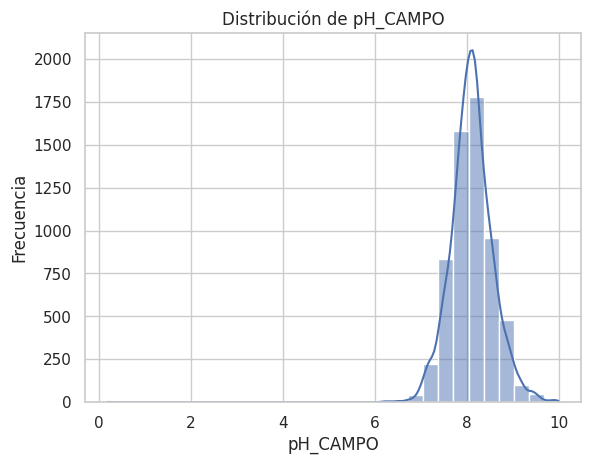

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mostrar el histograma de la columna "CLOROF_A"
sns.histplot(data=data_filtrado, x='pH_CAMPO', bins=30, kde=True)
plt.xlabel('pH_CAMPO')
plt.ylabel('Frecuencia')
plt.title('Distribución de pH_CAMPO')
plt.show()


In [321]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.losses import MeanAbsoluteError

#optimizer = Adagrad(learning_rate=0.01)
#optimizer = RMSprop(learning_rate=0.001)
#optimizer = SGD(learning_rate=0.01, momentum=0.9)

#loss = MeanAbsoluteError()

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)  
])
optimizer = Adam(learning_rate=0.001)
loss = MeanSquaredError()

model.compile(optimizer=optimizer, loss=loss, metrics=['mean_squared_error'])


In [241]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_133 (Dense)           (None, 64)                1408      
                                                                 
 dense_134 (Dense)           (None, 32)                2080      
                                                                 
 dense_135 (Dense)           (None, 16)                528       
                                                                 
 dense_136 (Dense)           (None, 1)                 17        
                                                                 
Total params: 4033 (15.75 KB)
Trainable params: 4033 (15.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [322]:
history = model.fit(X_train, y_train, epochs=500, batch_size=8, validation_split=0.2)


Epoch 1/500


417/417 [==============================] - 1s 2ms/step - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2/500
417/417 [==============================] - 1s 1ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 3/500
417/417 [==============================] - 1s 1ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 4/500
417/417 [==============================] - 1s 1ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 5/500
417/417 [==============================] - 1s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 6/500
417/417 [==============================] - 1s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 7/500
417/417 [=============

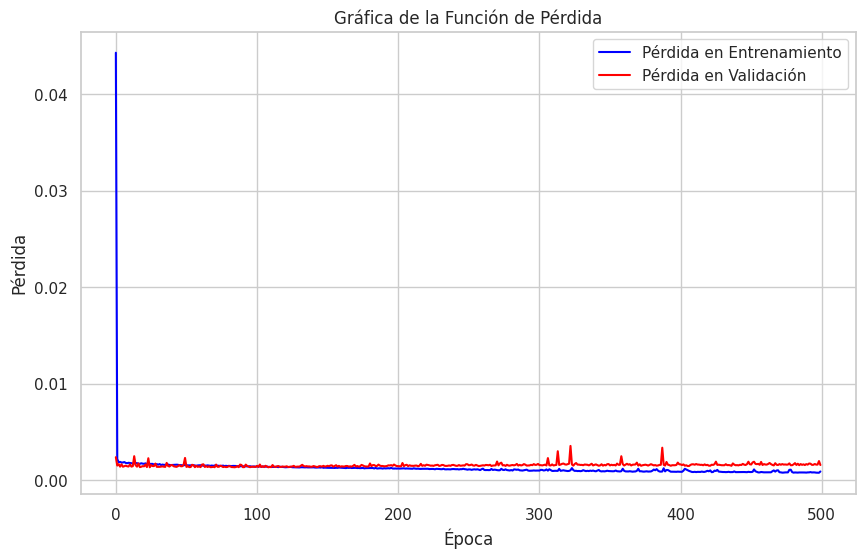

In [323]:
# Obtener las métricas de pérdida del historial
pérdida_entrenamiento = history.history['loss']
pérdida_validación = history.history['val_loss']

# Crear una gráfica de la función de pérdida
plt.figure(figsize=(10, 6))
plt.plot(pérdida_entrenamiento, label='Pérdida en Entrenamiento', color='blue')
plt.plot(pérdida_validación, label='Pérdida en Validación', color='red')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Gráfica de la Función de Pérdida')
plt.show()

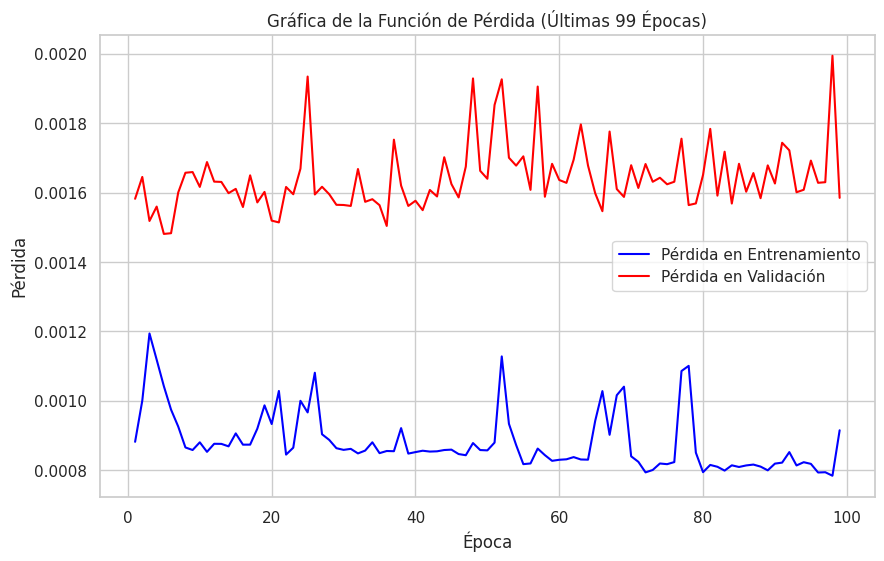

In [324]:
# Obtener las métricas de pérdida del historial
pérdida_entrenamiento = history.history['loss']
pérdida_validación = history.history['val_loss']

épocas = range(1, 100)

# Crear una gráfica de la función de pérdida para las últimas 99 épocas
plt.figure(figsize=(10, 6))
plt.plot(épocas, pérdida_entrenamiento[-99:], label='Pérdida en Entrenamiento', color='blue')
plt.plot(épocas, pérdida_validación[-99:], label='Pérdida en Validación', color='red')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Gráfica de la Función de Pérdida (Últimas 99 Épocas)')
plt.show()

In [325]:
loss = model.evaluate(X_test, y_test)
print("Pérdida en el conjunto de prueba:", loss)


33/33 [==============================] - 0s 824us/step - loss: 0.0016 - mean_squared_error: 0.0016
Pérdida en el conjunto de prueba: [0.001622777315787971, 0.001622777315787971]


In [326]:
print(X_test.shape)

(1042, 21)


In [327]:
valor_estimado = model.predict(X_test[0].reshape(1, -1))
print ("Valor estimado:", valor_estimado)

1/1 [==============================] - 0s 57ms/step
Valor estimado: [[0.75517416]]


In [328]:
#muestra el valor real de la columna objetivo
print ("Valor real:", y_test[0])

Valor real: [0.69387755]


In [337]:
from sklearn.metrics import mean_squared_error

# Tomar 100 valores de X_test para hacer pruebas
num_valores_prueba = 50
valores_prueba = X_test[:num_valores_prueba]

# Estimar los valores correspondientes con el modelo
valores_estimados = model.predict(valores_prueba)

# Tomar los valores reales correspondientes a los primeros 100 datos de prueba
valores_reales = y_test[:num_valores_prueba]

for estimado, real in zip(valores_estimados, valores_reales):
    print(f"Valor estimado: {estimado}, Valor real: {real}")

# Calcular el MSE
mse = mean_squared_error(valores_reales, valores_estimados)

print("Error Cuadrático Medio (MSE) en los primeros " + str(num_valores_prueba) + " datos de prueba:", mse)

#calcular el rmse
rmse = np.sqrt(mse)
print("Raíz del Error Cuadrático Medio (RMSE) en los primeros " + str(num_valores_prueba) + " datos de prueba:", rmse)

2/2 [==============================] - 0s 2ms/step
Valor estimado: [0.75517416], Valor real: [0.69387755]
Valor estimado: [0.7600095], Valor real: [0.80612245]
Valor estimado: [0.77712834], Valor real: [0.75510204]
Valor estimado: [0.80667186], Valor real: [0.81632653]
Valor estimado: [0.8587613], Valor real: [0.87653061]
Valor estimado: [0.7960509], Valor real: [0.80612245]
Valor estimado: [0.76991713], Valor real: [0.78571429]
Valor estimado: [0.8096281], Valor real: [0.82040816]
Valor estimado: [0.8101001], Valor real: [0.86734694]
Valor estimado: [0.83342195], Valor real: [0.83673469]
Valor estimado: [0.82332814], Valor real: [0.87755102]
Valor estimado: [0.8075111], Valor real: [0.81734694]
Valor estimado: [0.79674876], Valor real: [0.77857143]
Valor estimado: [0.81540036], Valor real: [0.82653061]
Valor estimado: [0.79335153], Valor real: [0.78571429]
Valor estimado: [0.81066084], Valor real: [0.81632653]
Valor estimado: [0.76020193], Valor real: [0.78571429]
Valor estimado: [0.8

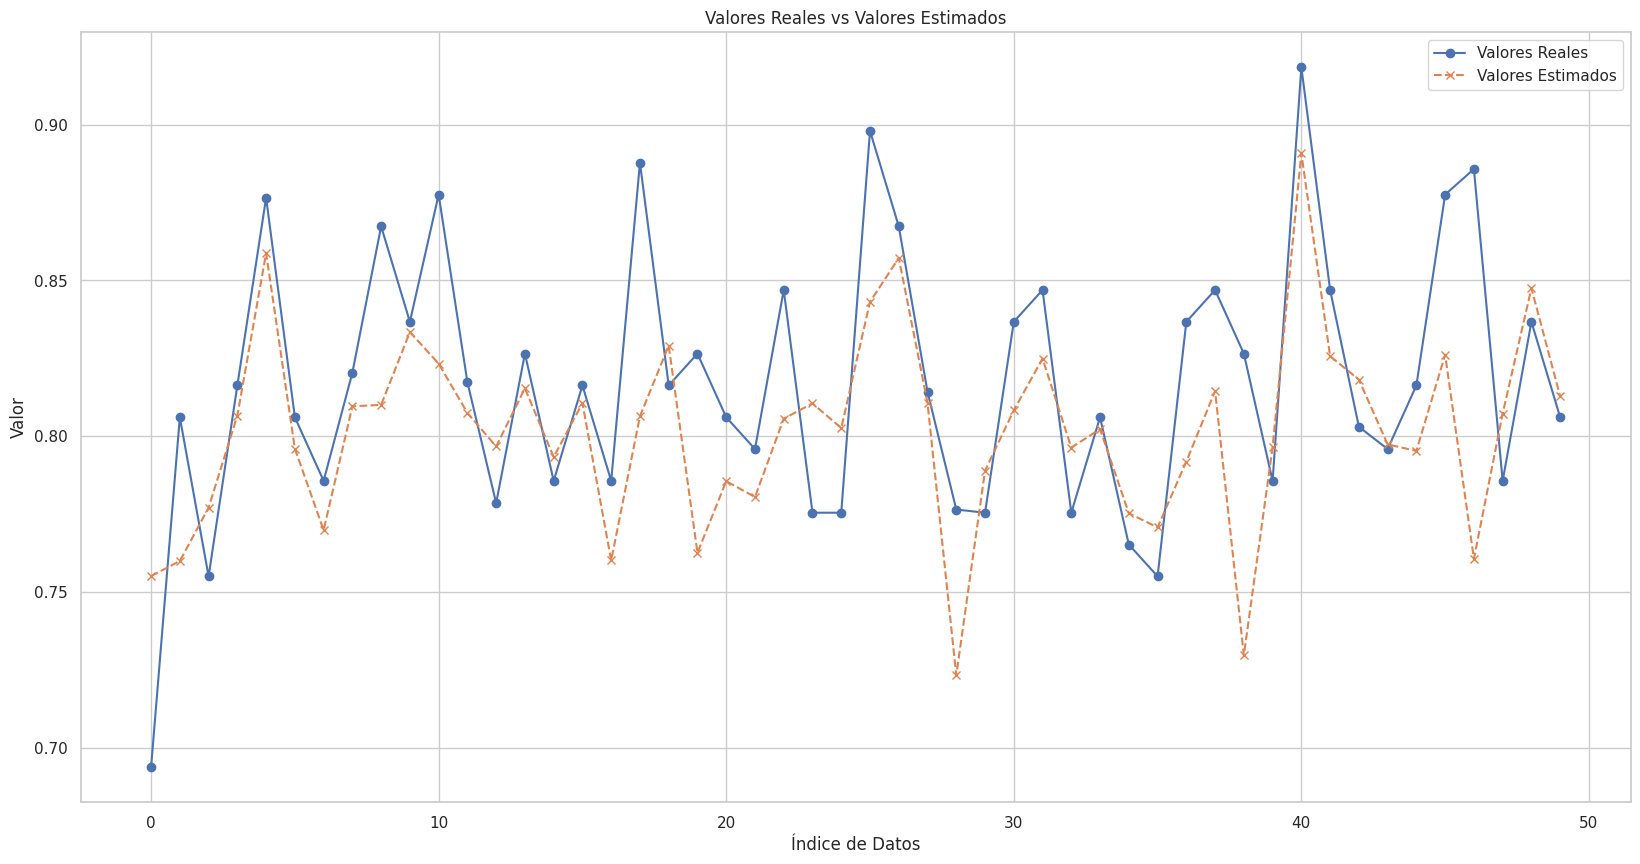

In [338]:
plt.figure(figsize=(20, 10))
plt.plot(valores_reales, label='Valores Reales', marker='o', linestyle='-')
plt.plot(valores_estimados, label='Valores Estimados', marker='x', linestyle='--')

# Etiquetas y título
plt.xlabel('Índice de Datos')
plt.ylabel('Valor')
plt.title('Valores Reales vs Valores Estimados')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

## Prueba 

In [183]:

# Separa las características (X) de la variable objetivo (y)
X = data.drop('variable_objetivo', axis=1)
y = data['variable_objetivo']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escala las características para normalizarlas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KeyError: "['variable_objetivo'] not found in axis"

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='linear')  # Ajusta la función de activación según el tipo de problema (regresión, clasificación, etc.)
])

# Compila el modelo
model.compile(optimizer='adam', loss='mean_squared_error')  # Cambia la función de pérdida según tu problema

# Resumen del modelo
model.summary()


In [ ]:
# Entrena el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evalúa el modelo en el conjunto de prueba
loss = model.evaluate(X_test, y_test)
print("Pérdida en el conjunto de prueba:", loss)


In [ ]:
# Realiza predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Puedes utilizar las predicciones para tomar decisiones o evaluar el rendimiento del modelo


## prueba 2 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Supongamos que la variable objetivo que deseas estimar se llama "y"
# y que esta variable está en la columna 31 del DataFrame original

# Eliminar la primera fila
data_sin_primera_fila = data_filtrado.iloc[1:]

# Crear un modelo de regresión (puedes usar otro modelo si lo prefieres)
modelo = LinearRegression()

# Supongamos que "X" son las características de tus datos y "y" es la variable objetivo
# En este caso, X sería todas las columnas excepto la columna 31 y la fila eliminada,
# y "y" sería la columna 31 en la fila eliminada.

X = data_sin_primera_fila.drop(columns=['pH_CAMPO'])  # Elimina la columna 31
y = data_filtrado.iloc[0]['pH_CAMPO']  # Obtiene el valor de la variable objetivo de la fila eliminada

print("Valor real de pH_CAMPO para la fila eliminada:", y)

# Entrenar el modelo con los datos restantes
modelo.fit(X, y)

# Ahora puedes usar el modelo entrenado para predecir el valor de "y" para la fila eliminada
valor_estimado = modelo.predict(X.iloc[[0]])

print("Valor real de pH_CAMPO para la fila eliminada:", y)
print("Valor estimado de pH_CAMPO para la fila eliminada:", valor_estimado[0])

Valor real de pH_CAMPO para la fila eliminada: 8.2


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values